In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Visulaisation and EDA

In [3]:
# Load the dataset
data = pd.read_csv("Data.csv")
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741


In [4]:
data.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [5]:
data.isnull().sum()

Date                       0
Symbol                     0
Series                     0
Prev Close                 0
Open                       0
High                       0
Low                        0
Last                       0
Close                      0
VWAP                       0
Volume                     0
Turnover                   0
Trades                114848
Deliverable Volume     16077
%Deliverble            16077
dtype: int64

There is non-availability of data related to trades for every Stock before 2012. We have all values available for all stocks after 2012.

In [6]:
data = data[data.Date >= '2012-01-01']
data.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

No NULL values present henceforth

In [7]:
Tickers = data["Symbol"].unique().tolist()
print(Tickers)
print(f"Total Number of Stocks: {len(Tickers)}")

['MUNDRAPORT', 'ADANIPORTS', 'ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJFINANCE', 'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY', 'EICHERMOT', 'GAIL', 'GRASIM', 'HCLTECH', 'HDFC', 'HDFCBANK', 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFY', 'IOC', 'ITC', 'JSWSTEEL', 'KOTAKBANK', 'LT', 'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID', 'RELIANCE', 'SBIN', 'SHREECEM', 'SUNPHARMA', 'TATAMOTORS', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN', 'ULTRACEMCO', 'UNIPHOS', 'UPL', 'SESAGOA', 'SSLT', 'VEDL', 'WIPRO', 'ZEEL']
Total Number of Stocks: 53


There are stock data of 53 stocks present here. But since we are working on NIFTY_50 data, there should only have been 49 stocks (We dont have data on INFRATEL). There are 53 because name of 4 Tickers got changed between the time period of 2012-2021 hence we are receiving these extra 3 Symbols/Tickers. The changed ones are namely: MUNDRAPORT, UNIPHOS, SESAGOA, SSLT

MUNDRAPORT and UNIPHOS were changed due to rebranding of the companies and hence data under these tickers can be used as data under their new Tickers (ADANIPORT and UPL). 

In cases like SESAGOA and SSLT, where the companies merged and became part of Vedanta Limited (VEDL), the business fundamentals might have changed. This means that historical data before the merger might not fully represent the current company's operations. So, data under these tickers should be ignored.

In [8]:
symbol_mapping = {
    'MUNDRAPORT': 'ADANIPORTS',
    'UNIPHOS': 'UPL',
}
data['Symbol'] = data['Symbol'].replace(symbol_mapping)
data = data[~data["Symbol"].isin(['SESAGOA', 'SSLT'])]

Tickers = data["Symbol"].unique().tolist()
print(Tickers)
print(f"Total Number of Stocks: {len(Tickers)}")

['ADANIPORTS', 'ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJFINANCE', 'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY', 'EICHERMOT', 'GAIL', 'GRASIM', 'HCLTECH', 'HDFC', 'HDFCBANK', 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFY', 'IOC', 'ITC', 'JSWSTEEL', 'KOTAKBANK', 'LT', 'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID', 'RELIANCE', 'SBIN', 'SHREECEM', 'SUNPHARMA', 'TATAMOTORS', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN', 'ULTRACEMCO', 'UPL', 'VEDL', 'WIPRO', 'ZEEL']
Total Number of Stocks: 49


In [9]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, format='mixed')
data.index = data.Date
data = data.drop(columns=["Date"], axis=1)
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2012-01-02,ADANIPORTS,EQ,120.05,122.80,123.75,111.0,115.0,114.70,115.90,1572363,1.822399e+13,20505.0,408586.0,0.2599
2012-01-03,ADANIPORTS,EQ,114.70,117.50,120.90,115.0,119.6,120.30,118.97,1385662,1.648520e+13,17541.0,651310.0,0.4700
2012-01-04,ADANIPORTS,EQ,120.30,121.00,123.50,118.0,122.7,122.85,120.33,1259249,1.515310e+13,10912.0,722926.0,0.5741
2012-01-05,ADANIPORTS,EQ,122.85,122.00,127.60,121.3,127.0,126.70,125.30,788405,9.878425e+12,10614.0,315199.0,0.3998
2012-01-06,ADANIPORTS,EQ,126.70,126.25,128.75,124.3,127.0,127.70,126.44,1036623,1.310736e+13,11658.0,401367.0,0.3872


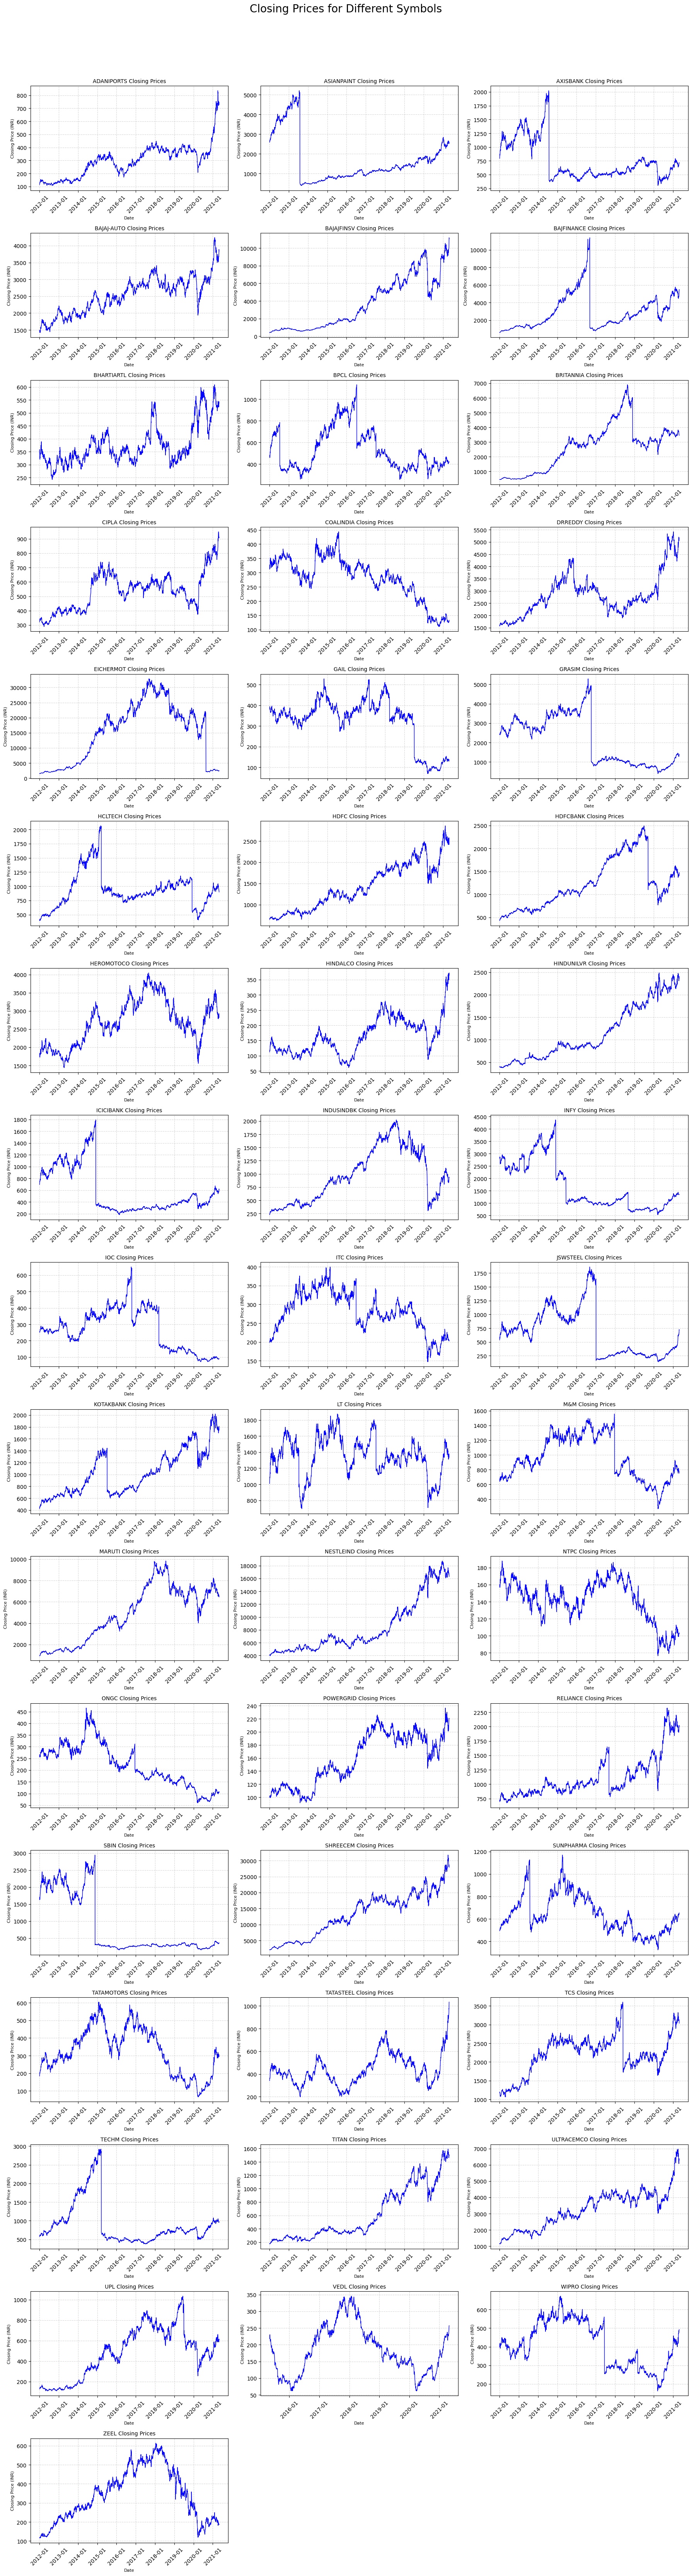

In [10]:
import math

# Number of symbols
num_symbols = len(Tickers)

# Set up the grid layout (3 columns)
rows = math.ceil(num_symbols / 3)
cols = 3

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, 4 * rows))
fig.suptitle('Closing Prices for Different Symbols', fontsize=20)

# Flatten axes array for easy indexing
axes = axes.flatten()

# Plot closing prices for each symbol
for i, symbol in enumerate(Tickers):
    # Filter data for the current symbol
    symbol_data = data[data["Symbol"] == symbol]

    # Plot on the corresponding subplot
    axes[i].plot(symbol_data.index.tolist(), symbol_data["Close"], color='blue', linestyle='-', linewidth=1)

    # Adding titles and labels to the current subplot
    axes[i].set_title(f'{symbol} Closing Prices', fontsize=10)
    axes[i].set_xlabel('Date', fontsize=8)
    axes[i].set_ylabel('Closing Price (INR)', fontsize=8)

    # Rotate the x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)

    # Format the x-axis date labels
    axes[i].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))

    # Adding gridlines
    axes[i].grid(visible=True, linestyle='--', alpha=0.5)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title
plt.show()


Here it can be seen that there are trends in stock with a sudden decrease in close price. These happen due to external factors which we are not going to model here. So, we might need to have a different eda/ model for these trends than that of regular trends.

In [11]:
# Initialize dictionaries to store categorized symbols
stable_trend = []
sudden_changes = []

# Categorization thresholds
change_threshold = 0.3 # For sudden change detection

for symbol in Tickers:
    # Get the closing prices for the symbol
    symbol_data = data[data["Symbol"] == symbol]["Close"].values
    
    # Calculate percentage change
    percent_changes = np.diff(symbol_data) / symbol_data[:-1]

    # Detect sudden changes
    sudden_change_detected = np.any(np.abs(percent_changes) > change_threshold)

    # Categorize based on criteria
    if sudden_change_detected:
        sudden_changes.append(symbol)
    else:
        stable_trend.append(symbol)

# Output results
print("Stable Trend Symbols:", stable_trend)
print("Sudden Change Symbols:", sudden_changes)

Stable Trend Symbols: ['ADANIPORTS', 'BAJAJ-AUTO', 'BAJAJFINSV', 'BHARTIARTL', 'CIPLA', 'COALINDIA', 'DRREDDY', 'HDFC', 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR', 'MARUTI', 'NESTLEIND', 'NTPC', 'POWERGRID', 'SHREECEM', 'TATAMOTORS', 'TATASTEEL', 'TITAN', 'ULTRACEMCO', 'VEDL', 'ZEEL']
Sudden Change Symbols: ['ASIANPAINT', 'AXISBANK', 'BAJFINANCE', 'BPCL', 'BRITANNIA', 'EICHERMOT', 'GAIL', 'GRASIM', 'HCLTECH', 'HDFCBANK', 'ICICIBANK', 'INDUSINDBK', 'INFY', 'IOC', 'ITC', 'JSWSTEEL', 'KOTAKBANK', 'LT', 'M&M', 'ONGC', 'RELIANCE', 'SBIN', 'SUNPHARMA', 'TCS', 'TECHM', 'UPL', 'WIPRO']


Here, we are going to perform EDA on one symbol of each trend intsead of a different sets of EDA for all Symbols assuming that all other symbols of same group will behave in similar fashion under EDA.

In [14]:
data_adaniports = data[data["Symbol"] == 'ADANIPORTS']
data_asianpaints = data[data["Symbol"] == 'ASIANPAINT']

print("ADANIPOTS:")
display(data_adaniports)
print("ASIANPAINT:")
display(data_asianpaints)

ADANIPOTS:


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2012-01-02,ADANIPORTS,EQ,120.05,122.80,123.75,111.00,115.0,114.70,115.90,1572363,1.822399e+13,20505.0,408586.0,0.2599
2012-01-03,ADANIPORTS,EQ,114.70,117.50,120.90,115.00,119.6,120.30,118.97,1385662,1.648520e+13,17541.0,651310.0,0.4700
2012-01-04,ADANIPORTS,EQ,120.30,121.00,123.50,118.00,122.7,122.85,120.33,1259249,1.515310e+13,10912.0,722926.0,0.5741
2012-01-05,ADANIPORTS,EQ,122.85,122.00,127.60,121.30,127.0,126.70,125.30,788405,9.878425e+12,10614.0,315199.0,0.3998
2012-01-06,ADANIPORTS,EQ,126.70,126.25,128.75,124.30,127.0,127.70,126.44,1036623,1.310736e+13,11658.0,401367.0,0.3872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079.0,0.0892
2021-04-27,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639.0,0.0865
2021-04-28,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353.0,0.1203


ASIANPAINT:


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2012-01-02,ASIANPAINT,EQ,2592.35,2560.00,2617.95,2560.00,2613.95,2590.30,2583.83,18245,4.714195e+12,2016.0,5021.0,0.2752
2012-01-03,ASIANPAINT,EQ,2590.30,2600.20,2660.00,2600.15,2660.00,2652.30,2636.25,17485,4.609479e+12,2762.0,6520.0,0.3729
2012-01-04,ASIANPAINT,EQ,2652.30,2619.05,2699.90,2619.05,2675.00,2674.95,2675.66,34186,9.147026e+12,3788.0,19796.0,0.5791
2012-01-05,ASIANPAINT,EQ,2674.95,2673.90,2690.95,2660.00,2680.00,2671.70,2672.22,71958,1.922879e+13,3406.0,63328.0,0.8801
2012-01-06,ASIANPAINT,EQ,2671.70,2648.05,2684.95,2645.10,2660.00,2660.60,2662.85,381554,1.016020e+14,6132.0,365872.0,0.9589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,ASIANPAINT,EQ,2517.95,2530.00,2575.00,2530.00,2558.00,2557.90,2557.47,1103980,2.823400e+14,58557.0,335232.0,0.3037
2021-04-27,ASIANPAINT,EQ,2557.90,2545.00,2579.90,2534.00,2571.00,2574.35,2560.55,866331,2.218288e+14,66988.0,281178.0,0.3246
2021-04-28,ASIANPAINT,EQ,2574.35,2588.00,2620.25,2575.00,2612.00,2614.55,2605.91,1065561,2.776752e+14,52622.0,449241.0,0.4216
